##基礎演習S 後半第3回

NE21-1228F
鈴木　拓己

In [ ]:
if(!require("magrittr")){install.packages("magrittr")}; library(magrittr)
if(!require("rvest")){install.packages("rvest")}; library(rvest)
if(!require("stringr")){install.packages("stringr")}; library(stringr)
if(!require("leaflet")){install.packages("leaflet")}; library(leaflet)
if(!require("htmlwidgets")){install.packages("htmlwidgets")}; library(htmlwidgets)
if(!require("maptools")){install.packages("maptools")}; library(maptools)
if(!require("classInt")){install.packages("classInt")}; library(classInt)
if(!require("RColorBrewer")){install.packages("RColorBrewer")}; library(RColorBrewer)
if(!require("rgdal")){install.packages("rgdal")}; library(rgdal)

###Ex.3-3　世界地図－新型コロナ
##### 【問題】例題3-3では，連続的な色のグラデーションにより国別人口の世界地図を描いた．ここでは，新型コロナウイルス感染症（COVID-19）の国別感染者数（人口10万人あたり）を地図にしたい．色分けの級間隔（style）を指定し，またパレットも変更して，視覚的に分かりやすい離散的な色分けにして欲しい．レポートは，以下が分かるように記述すること：Rスクリプト，出力（地図等），コメント（作成方法，気付きなど）．

In [2]:
system("apt -y install zip && unzip ne_50m_admin_0_countries.zip")    # zip解凍（含7ファイル）

OGR data source with driver: ESRI Shapefile 
Source: "/content/ne_50m_admin_0_countries.shp", layer: "ne_50m_admin_0_countries"
with 242 features
It has 168 fields
Integer64 fields read as strings:  NE_ID 


Object of class SpatialPolygonsDataFrame
Coordinates:
         min       max
x -180.00000 180.00000
y  -89.99893  83.59961
Is projected: FALSE 
proj4string : [+proj=longlat +datum=WGS84 +no_defs]
Data attributes:
  featurecla          scalerank      LABELRANK      SOVEREIGNT       
 Length:242         Min.   :1.00   Min.   :2.000   Length:242        
 Class :character   1st Qu.:1.00   1st Qu.:3.000   Class :character  
 Mode  :character   Median :1.00   Median :4.000   Mode  :character  
                    Mean   :1.88   Mean   :4.157                     
                    3rd Qu.:3.00   3rd Qu.:6.000                     
                    Max.   :6.00   Max.   :7.000                     
    SOV_A3             ADM0_DIF         LEVEL           TYPE          
 Length:242         Min.   :0.000   Min.   :1.000   Length:242        
 Class :character   1st Qu.:0.000   1st Qu.:2.000   Class :character  
 Mode  :character   Median :0.000   Median :2.000   Mode  :character  
             

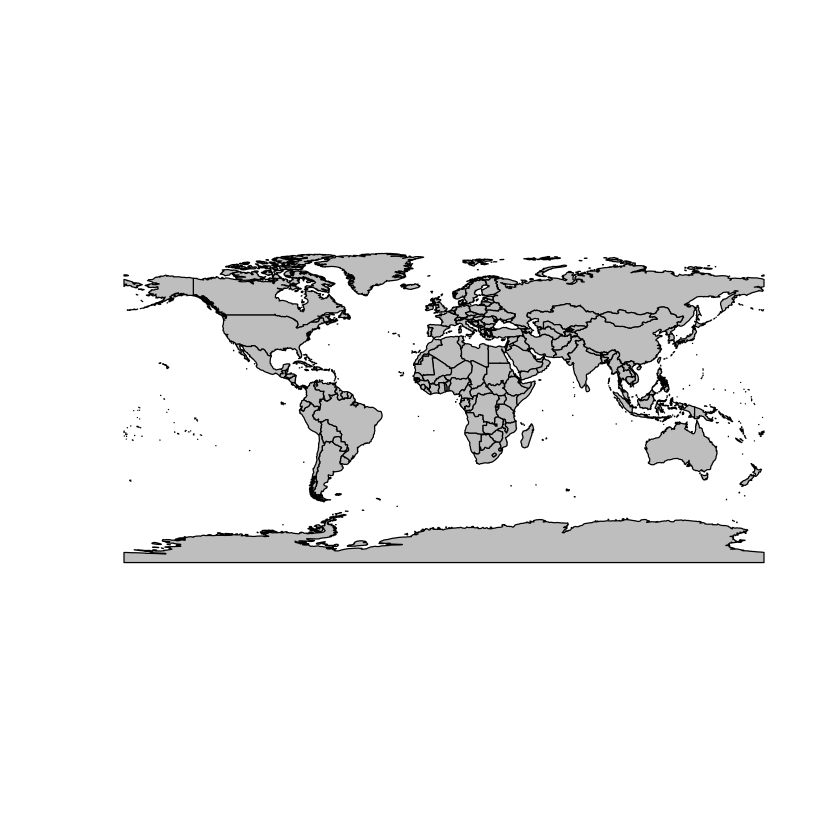

In [116]:
# 地図データ（shapeファイル）の読み込み（国のアルファベット順）
world <- readOGR("ne_50m_admin_0_countries.shp",
                 stringsAsFactor=FALSE)	  # shapeファイル読み込み（241国）
plot(world, col="grey")     # col色でworldのpolygonプロット
summary(world)              # worldのデータ部分の要約（各種言語の国名が多い）

In [117]:
df_all <- read.csv("/content/WHO-COVID-19-global-table-data.csv")
df_all

,Name,WHO.Region,Cases...cumulative.total,Cases...cumulative.total.per.100000.population,Cases...newly.reported.in.last.7.days,Cases...newly.reported.in.last.7.days.per.100000.population,Cases...newly.reported.in.last.24.hours,Deaths...cumulative.total,Deaths...cumulative.total.per.100000.population,Deaths...newly.reported.in.last.7.days,Deaths...newly.reported.in.last.7.days.per.100000.population,Deaths...newly.reported.in.last.24.hours
,<chr>,<int>,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<lgl>
Global,,545226550,6994.980,4957783,63.60584,829623,6334728,81.27135,9410,0.1207255,1500,NA
United States of America,Americas,86433723,26112.698,760299,229.69600,142306,1007644,304.42200,2362,0.7140000,583,NA
India,South-East Asia,43469234,3149.934,106940,7.74900,17070,525139,38.05300,185,0.0130000,23,NA
Brazil,Americas,32282879,15187.696,392146,184.48800,75925,671125,315.73500,1595,0.7500000,277,NA
France,Europe,30159074,46370.497,637166,979.66200,133346,146163,224.73000,242,0.3720000,42,NA
Germany,Europe,28293960,34020.775,567915,682.86300,76945,141189,169.76600,77,0.0930000,7,NA
The United Kingdom,Europe,22720797,33469.045,126012,185.62300,14586,180330,265.63600,340,0.5010000,12,NA
Italy,Europe,18523111,31057.426,451477,756.98500,84234,168353,282.27500,386,0.6470000,59,NA
Russian Federation,Europe,18433394,12631.283,20589,14.10800,3155,381165,261.18900,389,0.2670000,53,NA


In [94]:
df <- data.frame(rownames(df_all),df_all[,3]);
colnames(df) <- c("Name","Cumu_cases")
df <- df[2:nrow(df),]; df

,Name,Cumu_cases
,<chr>,<dbl>
2,United States of America,26112.698
3,India,3149.934
4,Brazil,15187.696
5,France,46370.497
6,Germany,34020.775
7,The United Kingdom,33469.045
8,Italy,31057.426
9,Russian Federation,12631.283
10,Republic of Korea,35828.260


In [113]:
df[order(df$Cumu_cases,decreasing=T),]

,Name,Cumu_cases
,<chr>,<dbl>
165,Faroe Islands,70926.02
88,Cyprus,58062.29
179,Gibraltar,57303.14
155,Andorra,57175.95
39,Denmark,54471.84
115,Iceland,53273.52
181,San Marino,53085.04
114,Martinique,52206.31
223,Falkland Islands (Malvinas),52110.25


In [118]:
id <- match(world@data$NAME_EN,df$Name); #id
pope <- df$Cumu_cases[id];pope
cname <- world@data$NAME_EN; cname

[1]  1718.067  1769.739    39.643        NA        NA        NA  3670.253
  [8]   719.635 27567.744        NA    30.408        NA 20041.178 25768.034
 [15] 11785.061 27027.429 26112.698        NA        NA     0.000     0.000
 [22] 23036.928        NA 41343.579 25953.463 22955.320 16062.297 20364.073
 [29] 49991.651 42037.910 42881.503        NA  9544.829 11474.017   362.054
 [36]     0.000        NA  8902.732 11931.435 11638.204   451.797        NA
 [43]  6483.195        NA   186.482        NA        NA 43235.600 24392.905
 [50]  6298.161 13784.451   158.321   142.817  3101.528 26903.306        NA
 [57]  6733.993   168.644        NA  3136.483 32916.742 49560.729 24683.480
 [64]    96.453 45539.772 29298.245   515.441  2282.102        NA 53085.037
 [71]  7512.575  8164.774 14715.701 11402.091  1011.333        NA 15083.612
 [78] 13258.208 50226.124 15848.075  3380.517 10994.502  9190.726   499.887
 [85] 21316.099 28852.532   694.974  7641.915 26950.022        NA   124.813
 [92]    37.308   221.751 27755.731   927.070 32874.061 47015.017 38137.609
 [99] 27146.191  3362.513 31327.303  6536.490   729.214  3286.068        NA
[106] 38247.179 28325.316        NA 33245.846  4643.442 18166.521  1275.879
[113] 20042.599   153.895 33593.195 14107.567   451.700   236.109 15072.526
[120] 42256.448 41572.319 46078.406  7307.767   148.230  1584.223 16274.719
[127] 43812.337        NA  3081.654 15056.628        NA  2709.106   620.580
[134]  7434.978 16653.677  7376.487  4825.597 31057.426 50304.273        NA
[141] 32241.582  5832.291        NA  2226.685  3149.934 53273.520 19736.116
[148]  4314.709   276.693  8559.510   424.187   282.674  5055.056 16313.998
[155] 34300.319   534.655 34020.775 41623.368        NA  2153.851 46370.497
[162] 47748.059  4036.991 28329.755 47516.439 26082.561 22535.009        NA
[169]        NA 20733.927  7330.400   423.465 43650.976   275.997  1142.849
[176]  2615.489   502.361  5149.607  5584.338 20630.357  1588.057 21086.099
[183] 70926.021 54471.838        NA        NA 58062.286  9764.814 28301.659
[190]        NA 17764.292   102.045        NA   935.946 12089.238        NA
[197]        NA        NA 20875.973    45.203   297.551        NA 10370.301
[204]   452.304   815.116  1127.731   359.085   100.673 16863.152        NA
[211] 15187.696 13613.001 11543.351        NA  7740.848   224.495 16043.890
[218] 36850.511 10401.456 29263.158  1199.641 36687.716        NA  7823.842
[225] 50231.658 31891.165        NA        NA        NA        NA 14283.145
[232] 20725.770  8823.740   308.280 57175.953   606.797  9740.010   468.630
[239]        NA        NA 24672.357    25.441

[1] "Zimbabwe"                                    
  [2] "Zambia"                                      
  [3] "Yemen"                                       
  [4] "Vietnam"                                     
  [5] "Venezuela"                                   
  [6] "Vatican City"                                
  [7] "Vanuatu"                                     
  [8] "Uzbekistan"                                  
  [9] "Uruguay"                                     
 [10] "Federated States of Micronesia"              
 [11] "Marshall Islands"                            
 [12] "Northern Mariana Islands"                    
 [13] "United States Virgin Islands"                
 [14] "Guam"                                        
 [15] "American Samoa"                              
 [16] "Puerto Rico"                                 
 [17] "United States of America"                    
 [18] "South Georgia and the South Sandwich Islands"
 [19] "British Indian Ocean Territory"              
 [20] "Saint Helena"                                
 [21] "Pitcairn Islands"                            
 [22] "Anguilla"                                    
 [23] "Falkland Islands"                            
 [24] "Cayman Islands"                              
 [25] "Bermuda"                                     
 [26] "British Virgin Islands"                      
 [27] "Turks and Caicos Islands"                    
 [28] "Montserrat"                                  
 [29] "Jersey"                                      
 [30] "Guernsey"                                    
 [31] "Isle of Man"                                 
 [32] "United Kingdom"                              
 [33] "United Arab Emirates"                        
 [34] "Ukraine"                                     
 [35] "Uganda"                                      
 [36] "Turkmenistan"                                
 [37] "Turkey"                                      
 [38] "Tunisia"                                     
 [39] "Trinidad and Tobago"                         
 [40] "Tonga"                                       
 [41] "Togo"                                        
 [42] "East Timor"                                  
 [43] "Thailand"                                    
 [44] "Tanzania"                                    
 [45] "Tajikistan"                                  
 [46] "Taiwan"                                      
 [47] "Syria"                                       
 [48] "Switzerland"                                 
 [49] "Sweden"                                      
 [50] "Eswatini"                                    
 [51] "Suriname"                                    
 [52] "South Sudan"                                 
 [53] "Sudan"                                       
 [54] "Sri Lanka"                                   
 [55] "Spain"                                       
 [56] "South Korea"                                 
 [57] "South Africa"                                
 [58] "Somalia"                                     
 [59] "Somaliland"                                  
 [60] "Solomon Islands"                             
 [61] "Slovakia"                                    
 [62] "Slovenia"                                    
 [63] "Singapore"                                   
 [64] "Sierra Leone"                                
 [65] "Seychelles"                                  
 [66] "Serbia"                                      
 [67] "Senegal"                                     
 [68] "Saudi Arabia"                                
 [69] "São Tomé and Príncipe"                       
 [70] "San Marino"                                  
 [71] "Samoa"                                       
 [72] "Saint Vincent and the Grenadines"            
 [73] "Saint Lucia"                                 
 [74] "Saint Kitts and Nevis"                       
 [75] "Rwanda"                                      
 [76] "Russia"             

In [99]:
# 凡例付加
addleg <- function(q, pal, ns, x, cex=1, ncol=1){     # 関数定義
  a <- q$brks[-length(q$brks)] %>% round(ns) %>% format(nsmall=ns)
  b <- q$brks[-1] %>% round(ns) %>% format(nsmall=ns)
  leg <- paste0(a, "-", b)
  legend(x=x, fill=pal(q$brks), cex=cex, ncol=ncol, legend=leg)
}

Warning message in classIntervals(pope, n = 11, style = "kmeans", dataPrecision = 0):
“var has missing values, omitted in finding classes”


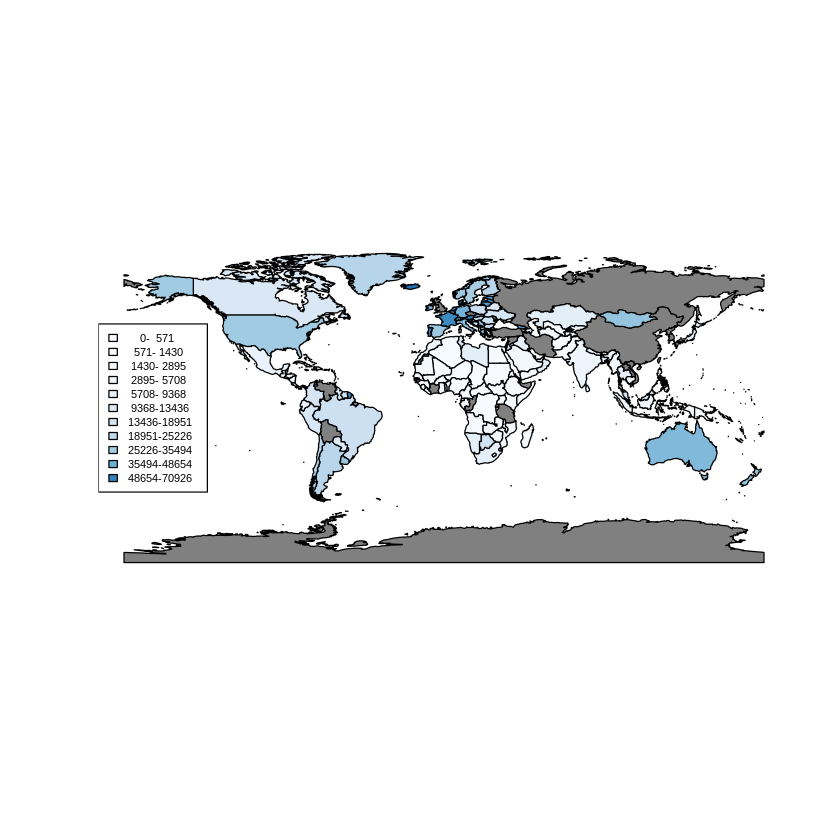

In [115]:
# 色分けの級間隔(style)指定; データと区間→連続値で表現する場合は不要
#q_world <- classIntervals(pope,n=11,style="quantile",dataPrecision=0)	# 等量分類
#q_world <- classIntervals(pope,n=11,style="equal",dataPrecision=0)      # 等間隔分類
q_world <- classIntervals(pope,n=11,style="kmeans",dataPrecision=0)	  #
#－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－
# カラーパレットの作成　※palは関数（値を色に対応）
pal <- colorNumeric("Blues", domain=pope, reverse=F)
#－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－
# [6] 地図描画(1)（plot）
plot(world, col=pal(pope))	# 地図をプロット
# 凡例付加
addleg(q=q_world, pal=pal, ns=0, x="left", cex=0.55)

In [119]:
# 地図描画(2)（leaflet）とhtml生成
m <- leaflet(world) %>% addProviderTiles(providers$CartoDB.PositronNoLabels) %>%
  setView(lng=0, lat=0, zoom=1) %>%
  addPolygons(
    weight=1,
    fillOpacity = 0.5,
    fillColor=~pal(pope)) %>%
  addLegend("bottomright", pal = pal, values = ~pope, title = "人口")

saveWidget(m, "world_Infection.html")